# Final Project Submission

- Student name: Adam Chang
- Student pace: Part-Time
- Scheduled project review date/time: 05/15/19 6pm ET
- Instructor name: Victor Geislinger
- Blog post URL: ???

### Task Description
I have been given a modified dataset of the King County House Sales. Using the given data, I need to build a model that predicts future sales.

### Column Names and descriptions for Kings County Data Set
- <b>id</b> - unique identified for a house
- <b>dateDate</b> - house was sold
- <b>pricePrice</b> - is prediction target
- <b>bedroomsNumber</b> - of Bedrooms/House
- <b>bathroomsNumber</b> - of bathrooms/bedrooms
- <b>sqft_livingsquare</b> - footage of the home
- <b>sqft_lotsquare</b> - footage of the lot
- <b>floorsTotal</b> - floors (levels) in house
- <b>waterfront</b> - House which has a view to a waterfront
- <b>view</b> - Has been viewed
- <b>condition</b> - How good the condition is ( Overall )
- <b>grade</b> - overall grade given to the housing unit, based on King County grading system
- <b>sqft_above</b> - square footage of house apart from basement
- <b>sqft_basement</b> - square footage of the basement
- <b>yr_built</b> - Built Year
- <b>yr_renovated</b> - Year when house was renovated
- <b>zipcode</b> - zip
- <b>lat</b> - Latitude coordinate
- <b>long</b> - Longitude coordinate
- <b>sqft_living15</b> - The square footage of interior housing living space for the nearest 15 neighbors
- <b>sqft_lot15</b> - The square footage of the land lots of the nearest 15 neighbors

# Obtaining our data

In [2]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.api import formula
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import scipy.stats as stats
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
%matplotlib inline

# Obtain and quick review the data
df = pd.read_csv("kc_house_data.csv")
print(df.shape)
df.head()

(21597, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
# Review the column headers, data types, and # of rows per column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
# Look at the 5 point statistics (min, 25%, 50%, 75%, max)
# Review the numbers for any anomalies or integer columns that should be categorical
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


33 bedrooms for a house is odd. Let's get the unique count for bedrooms to see if this is a mistake. If it's only one record, we can drop it.

In [5]:
# Unique value count for bedrooms
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [6]:
# There is only 1 row with 33 bedrooms, so we drop it.
df = df.drop(df.bedrooms.idxmax())

# Scrubbing the Data

## String data stored as Numerics
- Currently, most datatypes are numeric
- We want to determine which columns should be category. I chose the columns below to be category because the numerics are more location and time, rather than house structure data.
    - id (Make sure all IDs are unique)
    - zipcode
    - lat
    - long
    - yr_built
    - yr_renovated (Because of NaN values, we will convert to string later on)

#### Examining the ID (unique identifier)
- The column is described as a "unique identifier for a house"

In [7]:
df.groupby(['id']).size().sort_values(ascending=False).head()

id
795000620     3
1000102       2
3333002450    2
5054800110    2
4443800385    2
dtype: int64

There are multiple records with the same ID. We need to investigate further.
- Is it because there are multiple records for the same house?
    - Why would there be 2 or more records for the same house?
- Or can this be an error?
    - We would need to delete and generate a new unique identifier

In [8]:
# We want to find out how many houses have multiple IDs
multiple_id = dict(df.groupby(['id']).size())
multiple_id = {k: v for k, v in multiple_id.items() if v > 1}
print("Number of IDs with duplicate records:",len(multiple_id))
print("Number of total records:", sum(multiple_id.values()))

Number of IDs with duplicate records: 176
Number of total records: 353


There are 176 IDs that have multiple records, affecting 353 total records.

In [9]:
# So there are 176 IDs with duplicate records
# I will match back to the original data
multiple_id = pd.DataFrame(multiple_id, index = ['count'])
multiple_id_df = multiple_id.T.reset_index()
multiple_id_df_merge = pd.merge(multiple_id_df, df, left_on = "index", right_on = "id", how="inner")

In [10]:
multiple_id_df_merge.head(10)

,index,count,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1000102,2,1000102,9/16/2014,280000.0,6,3.00,2400,9373,2.0,...,7,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
1,1000102,2,1000102,4/22/2015,300000.0,6,3.00,2400,9373,2.0,...,7,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
2,7200179,2,7200179,10/16/2014,150000.0,2,1.00,840,12750,1.0,...,6,840,0.0,1925,0.0,98055,47.4840,-122.211,1480,6969
3,7200179,2,7200179,4/24/2015,175000.0,2,1.00,840,12750,1.0,...,6,840,0.0,1925,NaN,98055,47.4840,-122.211,1480,6969
4,109200390,2,109200390,8/20/2014,245000.0,3,1.75,1480,3900,1.0,...,7,1480,0.0,1980,0.0,98023,47.2977,-122.367,1830,6956
5,109200390,2,109200390,10/20/2014,250000.0,3,1.75,1480,3900,1.0,...,7,1480,0.0,1980,0.0,98023,47.2977,-122.367,1830,6956
6,123039336,2,123039336,6/11/2014,148000.0,1,1.00,620,8261,1.0,...,5,620,0.0,1939,0.0,98106,47.5138,-122.364,1180,8244
7,123039336,2,123039336,12/8/2014,244900.0,1,1.00,620,8261,1.0,...,5,620,0.0,1939,NaN,98106,47.5138,-122.364,1180,8244
8,251300110,2,251300110,7/31/2014,225000.0,3,2.25,2510,12013,2.0,...,8,2510,0.0,1988,0.0,98003,47.3473,-122.314,1870,8017
9,251300110,2,251300110,1/14/2015,358000.0,3,2.25,2510,12013,2.0,...,8,2510,0.0,1988,0.0,98003,47.3473,-122.314,1870,8017


Judging from the first 5 duplicate IDs, they look to be the same house with different selling dates and prices.
Will need to verify this by grouping the ID field with other house columns...
- Bedrooms
- Bathrooms
- Sqft_living
- Sqft_lot
- floors
- condition
- grade
- yr_ built
- zipcode
- lat
- long

If the result is 176 records (Number of IDs with duplicate records), we know for sure that the id field is unique per house

In [11]:
len(multiple_id_df_merge.groupby(['id','bedrooms','bathrooms','sqft_living','sqft_lot','floors','condition','grade','yr_built','zipcode','lat','long']))
# The result is 176 so we know the ID field is accurately unique per house.

176

In [12]:
# Convert 'id', 'zipcode', 'lat', 'long' columns to strings
columns = ['id','zipcode','lat','long', 'yr_built']
for col in columns:
    df[col] = df[col].astype(str)

## Numeric Data Stored as Strings
- Among the object columns, only sqft_basement should be numeric
- I've tried converting to numeric but received an error. Find the non-numeric character.

In [13]:
# Getting the value counts to find the character.
df.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
200.0       105
750.0       104
450.0       103
480.0       103
530.0       103
720.0        98
620.0        90
840.0        83
580.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
780.0        76
550.0        76
650.0        75
240.0        74
680.0        73
380.0        73
360.0        72
          ...  
2390.0        1
1481.0        1
1816.0        1
2180.0        1
20.0          1
2490.0        1
1024.0        1
2130.0        1
3260.0        1
588.0         1
1281.0        1
1548.0        1
935.0         1
1798.0        1
1770.0        1
4820.0        1
1990.0        1
2570.0        1
2250.0        1
861.0         1
276.0         1
1920.0        1
2850.0        1
1284.0        1
652.0         1
792.0         1
906.0         1
2580.0        1
1960.0        1
374.0         1
Name: sqft_basement, Len

- Now that we know "?" is causing the disruption, what can we use to replace?<br>
- Looking at the first 5 records of df, it seems that sqft_above + sqft_basement = sqft_living, can we verify this with the rest of the data?

In [14]:
# Grabbing all the data where basement does NOT equal to ?
# Checking to see if there are any 'False' when 'above' + 'basement' = 'living'
basement = df[df.sqft_basement != "?"]
basement = basement.astype({"sqft_basement": float, "sqft_above": float, "sqft_living": float, "sqft_lot": float})
print((basement.sqft_basement.add(basement.sqft_above) == basement.sqft_living).unique())
print(len(basement.sqft_basement.add(basement.sqft_above) == basement.sqft_living))

[ True]
21142


We verified with the rest of the data that sqft_above + sqft_basement = sqft_living<br>
We will replace sqft_basement records that = "?" with sqft_living - sqft_above

In [15]:
# We verified with the rest of data, we will replace "?" with the...
# result of sqft_living - sqft_above and save as type: float
df = df.replace({"sqft_basement": "?"}, {"sqft_basement": np.NaN})
df = df.fillna({"sqft_basement": df["sqft_living"]-df["sqft_above"]})
df = df.astype({"sqft_basement": float})
df = df.astype({"sqft_basement": np.int64})

*Note* -Below code works as well, although it's one line, it operates very slowly.
df.replace({"sqft_basement": "?"}, {"sqft_basement": df["sqft_living"]-df["sqft_above"]})

## Dealing with Null Values
### View
#### view has 63 missing values. We have two options to deal with missing values.
- The 63 missing values account for only 0.3% of all data. Should we delete the rows?
- There are 5 unique values but the overwhelming majority of the counts belong to 0 (Almost 90%). Adding 63 to 19421 count will barely affect the data. Should we replace NaNs with 0?
- View is the number of people who viewed the house. It should be integer.

In [16]:
df.view.value_counts()

0.0    19421
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [17]:
# I decided the best course of action would be to replace NaNs with 0
# Changed the datatype to int
df = df.fillna({"view": 0.0}).astype({"view": np.int64})

### Yr_Renovated
#### yr_renovated has 3842 missing values.
- No renovation has count of 17010, 95.8% of non-NaN data
- All other counts total to 744, 4.2% of non-Nan data

#### If I assign the missing values to no renovation...
- No renovation has count of 20852, 96.6% of all data
- All other counts total to 744, 3.4% of all data

#### But what if renovated house prices are noticably higher than non-renovated house prices?
- If there is a noticable difference, are the missing value prices closly related to renovated house prices, non-renovated house prices, or neither?

In [18]:
df.yr_renovated.value_counts().head()

0.0       17010
2014.0       73
2003.0       31
2013.0       31
2007.0       30
Name: yr_renovated, dtype: int64

In [19]:
df.yr_renovated.describe()

count    17754.000000
mean        83.641489
std        399.957185
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [20]:
# Separating the column into 3 categories; Yes, No, NaN
renovated = df.dropna(subset=["yr_renovated"])
nan_renovated = df[pd.isnull(df["yr_renovated"])]
nan_renovated = nan_renovated.fillna({"yr_renovated": 1})
no_renovated = renovated[renovated.yr_renovated == 0.0]
yes_renovated = renovated[renovated.yr_renovated != 0.0]

I will compare the 3 categories of yr_renovated.<br> Mostly focusing on the price's 5 point statistics and mean.

In [21]:
nan_renovated.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15
count,3.842000e+03,3842.000000,3842.000000,3842.000000,3842.000000,3842.000000,3412.000000,3842.000000,3842.000000,3842.000000,3842.000000,3842.000000,3842.0,3842.000000,3842.000000
mean,5.386170e+05,3.348777,2.094157,2061.979178,14254.275377,1.486075,0.007327,0.241020,3.406299,7.640812,1774.889381,287.089797,1.0,1971.422436,12258.317022
std,3.583446e+05,0.895277,0.775021,920.365509,38026.156942,0.545270,0.085297,0.781659,0.641928,1.183317,832.655119,437.028179,0.0,686.522626,25102.870212
min,7.800000e+04,1.000000,0.500000,500.000000,635.000000,1.000000,0.000000,0.000000,1.000000,4.000000,490.000000,0.000000,1.0,460.000000,651.000000
25%,3.229760e+05,3.000000,1.500000,1410.000000,5040.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1.0,1470.000000,5058.500000
50%,4.500000e+05,3.000000,2.250000,1900.000000,7665.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1545.000000,0.000000,1.0,1820.000000,7624.500000
75%,6.433750e+05,4.000000,2.500000,2530.000000,10706.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2190.000000,560.000000,1.0,2320.000000,10015.500000
max,5.570000e+06,8.000000,6.750000,9200.000000,881654.000000,3.500000,1.000000,4.000000,5.000000,13.000000,8020.000000,3000.000000,1.0,5790.000000,392040.000000


In [22]:
no_renovated.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15
count,1.701000e+04,17010.000000,17010.000000,17010.000000,1.701000e+04,17010.000000,15156.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.0,17010.000000,17010.000000
mean,5.306711e+05,3.373192,2.112419,2073.685949,1.524201e+04,1.495473,0.006070,0.215403,3.418871,7.657672,1787.795062,285.890888,0.0,1989.992887,12844.018989
std,3.504250e+05,0.898028,0.760404,907.933756,4.227142e+04,0.540372,0.077677,0.730832,0.656222,1.169749,825.500890,437.326343,0.0,683.583090,27786.777624
min,8.000000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,0.0,399.000000,659.000000
25%,3.200000e+05,3.000000,1.750000,1420.500000,5.054250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,0.0,1490.000000,5100.000000
50%,4.475000e+05,3.000000,2.250000,1910.000000,7.616000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,0.0,1840.000000,7621.500000
75%,6.337500e+05,4.000000,2.500000,2540.000000,1.062175e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,540.000000,0.0,2370.000000,10073.250000
max,6.890000e+06,10.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,0.0,6210.000000,871200.000000


In [23]:
yes_renovated.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15
count,7.440000e+02,744.000000,744.000000,744.000000,744.000000,744.000000,652.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,7.689019e+05,3.459677,2.306116,2327.377688,16215.530914,1.504704,0.044479,0.599462,3.219086,7.752688,1878.719086,448.658602,1995.928763,1988.877688,13390.768817
std,6.271258e+05,1.068823,0.898233,1089.002040,38235.308760,0.493202,0.206314,1.211564,0.520494,1.196954,849.441413,551.664635,15.599946,715.440144,26213.648057
min,1.100000e+05,1.000000,0.750000,520.000000,1024.000000,1.000000,0.000000,0.000000,1.000000,4.000000,520.000000,0.000000,1934.000000,828.000000,1281.000000
25%,4.122500e+05,3.000000,1.750000,1560.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1267.500000,0.000000,1987.000000,1460.000000,5000.000000
50%,6.075020e+05,3.000000,2.250000,2200.000000,7375.000000,1.500000,0.000000,0.000000,3.000000,8.000000,1730.000000,200.000000,2000.000000,1850.000000,7455.000000
75%,9.000000e+05,4.000000,2.750000,2872.500000,12670.750000,2.000000,0.000000,0.000000,3.000000,8.000000,2300.000000,830.000000,2007.250000,2380.000000,10925.750000
max,7.700000e+06,11.000000,8.000000,12050.000000,478288.000000,3.000000,1.000000,4.000000,5.000000,13.000000,8570.000000,4820.000000,2015.000000,5500.000000,310582.000000


From eyeballing the statistics, there is a noticable difference between "yes" and "no".<br>
However, the "NaN" seems to be more similar to "No"<br>
I will run a boxplot to better view the 5 point statistics of the column

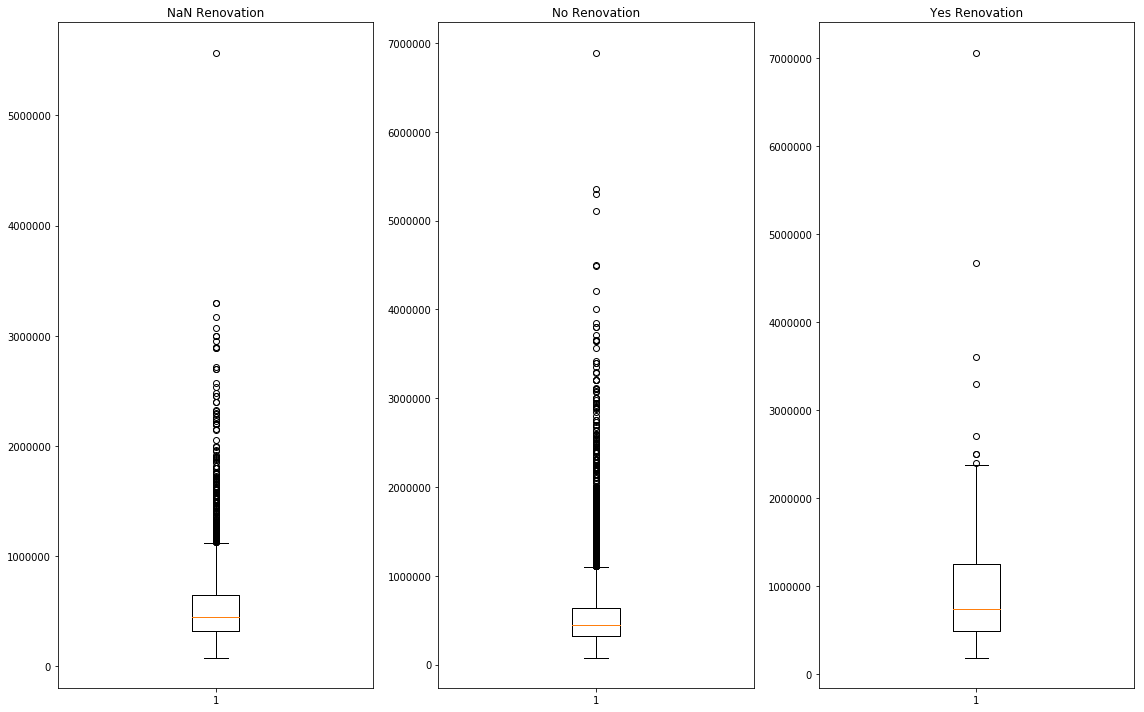

NaN renovation median: 450000.0
No renovation median: 447500.0
Yes renovation median: 607502.0


In [24]:
plt.figure(figsize=(16,10))
plt.subplot(1, 3, 1)
plt.boxplot(nan_renovated[nan_renovated.yr_renovated==1]['price'])
plt.title("NaN Renovation")

plt.subplot(1, 3, 2)
plt.boxplot(no_renovated[no_renovated.yr_renovated==0.0]['price'])
plt.title("No Renovation")

plt.subplot(1, 3, 3)
plt.boxplot(yes_renovated[yes_renovated.waterfront!=0.0]['price'])
plt.title("Yes Renovation")
plt.tight_layout()
plt.show()
print("NaN renovation median:", nan_renovated.price.median())
print("No renovation median:",no_renovated.price.median())
print("Yes renovation median:", yes_renovated.price.median())

In [25]:
df = df.fillna({"yr_renovated": 0.0}).astype({"yr_renovated": str})

#### For yr_renovated, I chose to assign 0 to NaN because...
- The mean price is very similar (NaN = 538167), (No = 530671), (Yes = 768902)
- The STD price is very similar (NaN = 358345), (No = 350425), (Yes = 627126)
- The boxplot is similar in terms of Median, Interquartile Range (Q1-Q3), minimum/maximum, and outliers.
- No renovation has an overwhelming majority of the total count
- Logically, it makes more sense that a missing value would more likely mean the house was not renovated

### Waterfront
#### waterfront has 2376 missing values
- Seems to be a categorical column with numeric datatype
- Option 1 is to replace NaNs with 0 because of the higher count
- Option 2 is replace NaNs with mean (0.0076)
- Option 3 is to use a numeric placeholder in place of NaN, such as 2

In [26]:
# Similar to yr_renovated, I'm separating into 3 categories; Yes, No, Nan
nan_waterfront = df.fillna({"waterfront": 2})
waterfront_0 = df[df.waterfront == 0]
waterfront_1 = df[df.waterfront == 1]

In [27]:
# Below shows the percentages of each category
nan_waterfront.waterfront.value_counts(normalize = True)

0.0    0.883219
2.0    0.110020
1.0    0.006761
Name: waterfront, dtype: float64

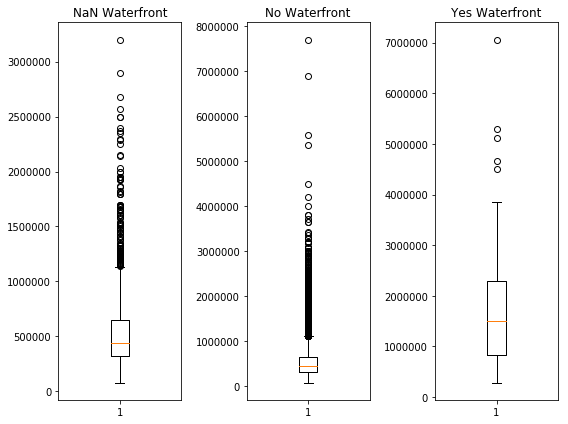

In [28]:
plt.figure(figsize=(8,6))
plt.subplot(1, 3, 1)
plt.boxplot(nan_waterfront[nan_waterfront.waterfront==2]['price'])
plt.title("NaN Waterfront")

plt.subplot(1, 3, 2)
plt.boxplot(df[df.waterfront==0]['price'])
plt.title("No Waterfront")

plt.subplot(1, 3, 3)
plt.boxplot(df[df.waterfront==1]['price'])
plt.title("Yes Waterfront")
plt.tight_layout()
plt.show()

In [29]:
df = df.fillna({"waterfront": 2}).astype({"waterfront": str})

#### There is no reason to use any of the options but I went with option 3 because...
- (Option 1) There are too many missing values. Also, according to the boxplot above, houses with a waterfront seem to have more value than houses without a waterfront. if I replace NaN with 0, it would skew the data.
- (Option 2) Because this data is essentially a yes/no question, there is no reason to use the mean to replace the NaN. I can't change datatype to boolean either because of option 1 reasoning above.
- (Option 3) A placeholder works best because I can simply filter out the data if I need to. Instead of seeing this column as a yes/no, I can view this column as a yes/no/maybe.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 21 columns):
id               21596 non-null object
date             21596 non-null object
price            21596 non-null float64
bedrooms         21596 non-null int64
bathrooms        21596 non-null float64
sqft_living      21596 non-null int64
sqft_lot         21596 non-null int64
floors           21596 non-null float64
waterfront       21596 non-null object
view             21596 non-null int64
condition        21596 non-null int64
grade            21596 non-null int64
sqft_above       21596 non-null int64
sqft_basement    21596 non-null int64
yr_built         21596 non-null object
yr_renovated     21596 non-null object
zipcode          21596 non-null object
lat              21596 non-null object
long             21596 non-null object
sqft_living15    21596 non-null int64
sqft_lot15       21596 non-null int64
dtypes: float64(3), int64(10), object(8)
memory usage: 3.6+ MB


All Null Values have been dealt with

# Checking for Multicollinearity
We need to check that our data does not have correlation between our predictor columns.<br>
Multicollinearity is an issue because changes in one predictor can be associated with another predictor. Therefore, a minor predictor change can cause an abnormally large change in the result.

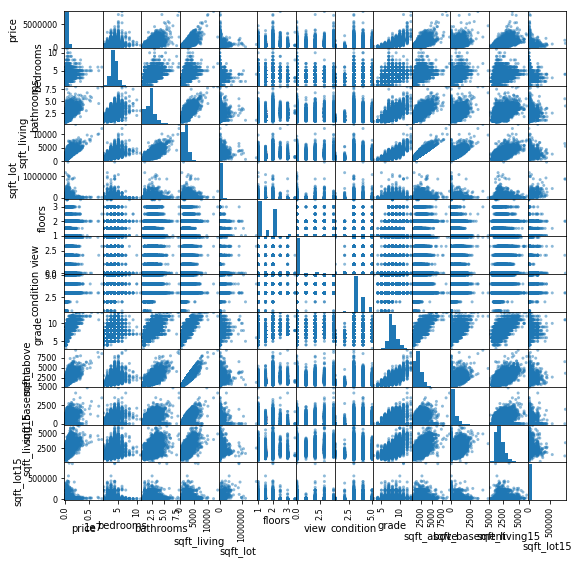

In [31]:
# Generating a scatterplot for numeric data to view correlation between predictors
pd.plotting.scatter_matrix(df,figsize  = [9, 9]);

The scatter matrix tells us...
- Almost every predictor is positively correlated to price
- Floors, view, and condition may need to be converted to dummy variables
- sqft_living, bathroom, and bedrooms may be culprits of multicollinearity<br>

Maybe a heatmap will tell us more

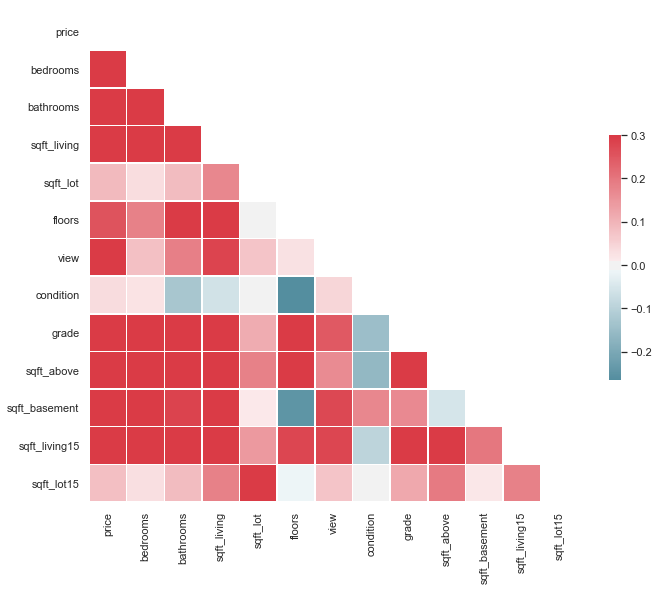

In [32]:
# Set the style of the visualization
sns.set(style="white")

# Create a covariance matrix
corr = df.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
           square=True, linewidths=.5, cbar_kws={"shrink": .5})

- According to the heatmap, almost all numeric columns are highly correlated with the target variable, price.
- Only sqft_lot, condition, and sqft_lot15 are slightly correlated.<br>

We should look at the correlation numbers before we drop any columns for multicollinearity

In [33]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
price,1.000000,0.315961,0.525915,0.701929,0.089879,0.256820,0.393502,0.036031,0.667964,0.605392,0.323794,0.585267,0.082849
bedrooms,0.315961,1.000000,0.527870,0.593178,0.033602,0.183707,0.080741,0.023440,0.366174,0.492543,0.309261,0.404532,0.031892
bathrooms,0.525915,0.527870,1.000000,0.755755,0.088368,0.502574,0.186011,-0.126443,0.665834,0.686664,0.283459,0.569878,0.088297
sqft_living,0.701929,0.593178,0.755755,1.000000,0.173449,0.353941,0.281710,-0.059397,0.762776,0.876448,0.435152,0.756400,0.184337
sqft_lot,0.089879,0.033602,0.088368,0.173449,1.000000,-0.004824,0.075052,-0.008806,0.114726,0.184134,0.015424,0.144756,0.718203
floors,0.256820,0.183707,0.502574,0.353941,-0.004824,1.000000,0.028401,-0.264013,0.458783,0.523970,-0.245694,0.280072,-0.010734
view,0.393502,0.080741,0.186011,0.281710,0.075052,0.028401,1.000000,0.045663,0.249077,0.166007,0.273858,0.278921,0.073079
condition,0.036031,0.023440,-0.126443,-0.059397,-0.008806,-0.264013,0.045663,1.000000,-0.146854,-0.158826,0.173801,-0.092979,-0.003093
grade,0.667964,0.366174,0.665834,0.762776,0.114726,0.458783,0.249077,-0.146854,1.000000,0.756069,0.168240,0.713863,0.120974
sqft_above,0.605392,0.492543,0.686664,0.876448,0.184134,0.523970,0.166007,-0.158826,0.756069,1.000000,-0.052130,0.731756,0.195069


In [34]:
# Viewing which predictor has the most 'True's
abs(df.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,True,True,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False
view,False,False,False,False,False,False,True,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,True,True,False,False,False
sqft_above,False,False,False,True,False,False,False,False,True,True,False,False,False


Sqft_living seems to be the culprit for multicollinearity

In [35]:
# Removing the most problematic feature from the data
df = df.drop(['sqft_living'],axis=1)

In [36]:
abs(df.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,False,False
view,False,False,False,False,False,True,False,False,False,False,False,False
condition,False,False,False,False,False,False,True,False,False,False,False,False
grade,False,False,False,False,False,False,False,True,True,False,False,False
sqft_above,False,False,False,False,False,False,False,True,True,False,False,False
sqft_basement,False,False,False,False,False,False,False,False,False,True,False,False


Looks like the multicollinearity is gone

# Normalizing the Data
The data contains features that vary in magnitude. This gives an unfair advantage to predictors with larger variance in data. In order to prevent this, we must...
- Log transformation to reduce data skewness.
- Min-Max scaling to reduce variability.

In [37]:
df.describe()

,price,bedrooms,bathrooms,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
count,2.159600e+04,21596.000000,21596.000000,2.159600e+04,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000
mean,5.402920e+05,3.371828,2.115843,1.509983e+04,1.494119,0.233191,3.409752,7.657946,1788.631506,291.711660,1986.650722,12758.656649
std,3.673760e+05,0.904114,0.768998,4.141355e+04,0.539685,0.764689,0.650471,1.173218,827.763251,442.673703,685.231768,27275.018316
min,7.800000e+04,1.000000,0.500000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,7.619000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,1.068550e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,2360.000000,10083.000000
max,7.700000e+06,11.000000,8.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,9410.000000,4820.000000,6210.000000,871200.000000


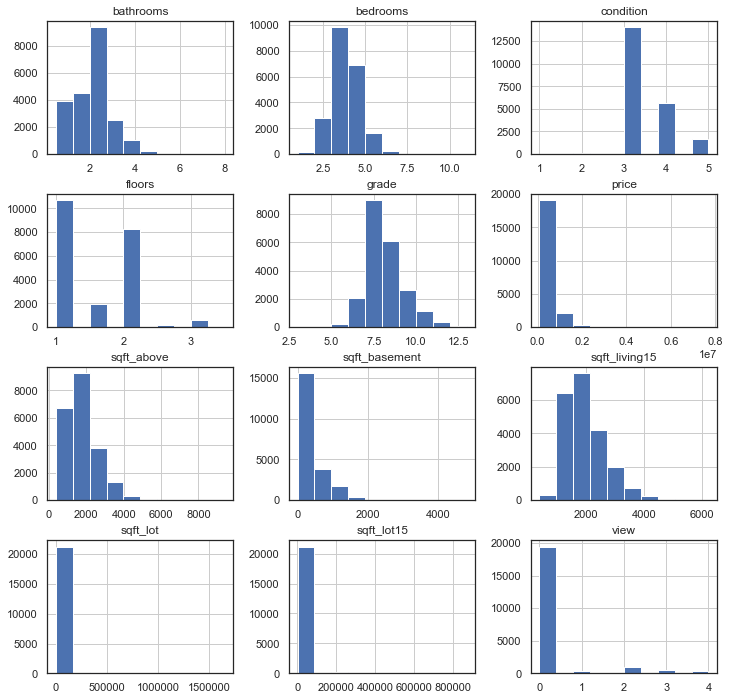

In [38]:
# Plot histograms of each numeric column to view the skewness and x-label values
df.hist(figsize=(12,12));

Based on the histograms above, the data has a large variability.<br> 
Mostly the sqft columns are very skewed.<br> 
As mentioned before on the scatterplot matrix, I will change 'view' and 'condition' to dummy variables. 

In [39]:
# Log transform most of the data.
# Cannot transform sqft_basement because of all the 0s.
df_log = pd.DataFrame([])
df_log['bedrooms'] = np.log(df["bedrooms"])
df_log['bathrooms'] = np.log(df["bathrooms"])
df_log['sqft_lot'] = np.log(df["sqft_lot"])
df_log['floors'] = np.log(df["floors"])
df_log['grade'] = np.log(df["grade"])
df_log['sqft_above'] = np.log(df["sqft_above"])
df_log['sqft_basement'] = df["sqft_basement"]
df_log['sqft_living15'] = np.log(df["sqft_living15"])
df_log['sqft_lot15'] = np.log(df["sqft_lot15"])

In [40]:
# Min-Max Scale the data
logbeds = df_log['bedrooms']
logbaths = df_log['bathrooms']
loglot = df_log['sqft_lot']
floor = df_log['floors']
loggrade = df_log['grade']
logabove = df_log['sqft_above']
basement = df_log['sqft_basement']
logliving15 = df_log['sqft_living15']
loglot15 = df_log['sqft_lot15']

df_final = pd.DataFrame([])
df_final["price"] = df['price']
df_final['bedrooms'] = (logbeds-min(logbeds))/(max(logbeds)-min(logbeds))
df_final['bathrooms'] = (logbaths-min(logbaths))/(max(logbaths)-min(logbaths))
df_final['sqft_lot'] = (loglot-min(loglot))/(max(loglot)-min(loglot))
df_final['floors'] = (floor-min(floor))/(max(floor)-min(floor))
df_final['grade'] = (loggrade-min(loggrade))/(max(loggrade)-min(loggrade))
df_final['sqft_above'] = (logabove-min(logabove))/(max(logabove)-min(logabove))
df_final['sqft_basement'] = (basement-min(basement))/(max(basement)-min(basement))
df_final['sqft_living15'] = (logliving15-min(logliving15))/(max(logliving15)-min(logliving15))
df_final['sqft_lot15'] = (loglot15-min(loglot15))/(max(loglot15)-min(loglot15))

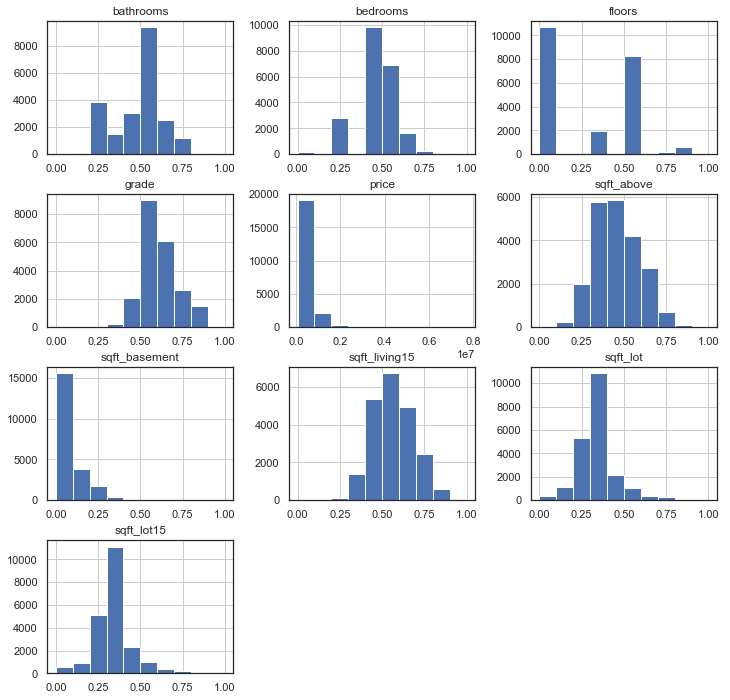

In [41]:
# Take another look at the histograms after the changes.
df_final.hist(figsize = [12, 12]);

Data now looks a lot more normalized

# One-Hot Encoding Categorical Columns
In order for the model to include categorical columns, it requires the columns to be one-hot encoded.<br>
Few of the columns have too many unique values, so I may need to bin them.<br>
I will also one-hot encode 'condition' and 'views'.

In [42]:
# Creating a dictionary to view the number of unique values for each variable
keys = []
values = []

for col in df.columns:
    keys.append(col)
    
for col in df:
    values.append(df[col].nunique())
    
dictionary = dict(zip(keys, values))

In [43]:
# current predictors that are categorical are...
# id, date, waterfront, yr_built, yr_renovated, zipcode, lat, long
dictionary

{'id': 21419,
 'date': 372,
 'price': 3622,
 'bedrooms': 11,
 'bathrooms': 29,
 'sqft_lot': 9776,
 'floors': 6,
 'waterfront': 3,
 'view': 5,
 'condition': 5,
 'grade': 11,
 'sqft_above': 942,
 'sqft_basement': 306,
 'yr_built': 116,
 'yr_renovated': 70,
 'zipcode': 70,
 'lat': 5033,
 'long': 751,
 'sqft_living15': 777,
 'sqft_lot15': 8682}

In [44]:
# Converting the categorical data back to floats for binning purposes.
df['lat'] = df['lat'].astype(float)
df['long'] = df['long'].astype(float)
df['yr_built'] = df['yr_built'].astype(float)
df['yr_renovated'] = df['yr_renovated'].astype(float)
df['zipcode'] = df['zipcode'].astype(float)
df['date'] = pd.to_datetime(df['date'])

In [45]:
# Looking at the 5-point statistics for above columns
df.describe()

,price,bedrooms,bathrooms,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159600e+04,21596.000000,21596.000000,2.159600e+04,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000
mean,5.402920e+05,3.371828,2.115843,1.509983e+04,1.494119,0.233191,3.409752,7.657946,1788.631506,291.711660,1971.000787,68.761391,98077.950685,47.560087,-122.213977,1986.650722,12758.656649
std,3.673760e+05,0.904114,0.768998,4.141355e+04,0.539685,0.764689,0.650471,1.173218,827.763251,442.673703,29.375460,364.045627,53.514040,0.138552,0.140725,685.231768,27275.018316
min,7.800000e+04,1.000000,0.500000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,7.619000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,1.068550e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,11.000000,8.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [46]:
# Creating bins for 'date'
bins = list(pd.date_range('2014-04-30', '2015-06-01', freq='M'))
bins_date = pd.cut(df['date'], bins)
bins_date = bins_date.cat.as_unordered()
bins_date.head()

0    (2014-09-30, 2014-10-31]
1    (2014-11-30, 2014-12-31]
2    (2015-01-31, 2015-02-28]
3    (2014-11-30, 2014-12-31]
4    (2015-01-31, 2015-02-28]
Name: date, dtype: category
Categories (13, interval[datetime64[ns]]): [(2014-04-30, 2014-05-31], (2014-05-31, 2014-06-30], (2014-06-30, 2014-07-31], (2014-07-31, 2014-08-31], ..., (2015-01-31, 2015-02-28], (2015-02-28, 2015-03-31], (2015-03-31, 2015-04-30], (2015-04-30, 2015-05-31]]

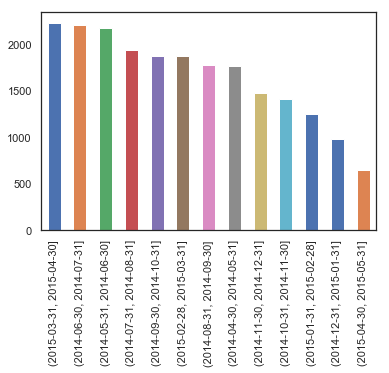

In [47]:
bins_date.value_counts().plot(kind='bar')

In [48]:
# Creating bins for 'lat'
bins = [47.1, 47.3, 47.4, 47.5, 47.6, 47.7, 47.8]
bins_lat = pd.cut(df['lat'], bins)
bins_lat = bins_lat.cat.as_unordered()
bins_lat.head()

0    (47.5, 47.6]
1    (47.7, 47.8]
2    (47.7, 47.8]
3    (47.5, 47.6]
4    (47.6, 47.7]
Name: lat, dtype: category
Categories (6, interval[float64]): [(47.1, 47.3], (47.3, 47.4], (47.4, 47.5], (47.5, 47.6], (47.6, 47.7], (47.7, 47.8]]

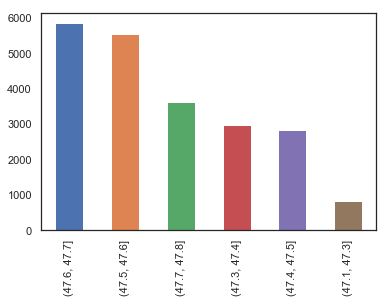

In [49]:
bins_lat.value_counts().plot(kind='bar')

In [50]:
# Creating bins for 'long'
bins = [-122.6, -122.4, -122.3, -122.2, -122.1, -122.0, -121.3]
bins_long = pd.cut(df['long'], bins)
bins_long = bins_long.cat.as_unordered()
bins_long.head()

0    (-122.3, -122.2]
1    (-122.4, -122.3]
2    (-122.3, -122.2]
3    (-122.4, -122.3]
4    (-122.1, -122.0]
Name: long, dtype: category
Categories (6, interval[float64]): [(-122.6, -122.4], (-122.4, -122.3], (-122.3, -122.2], (-122.2, -122.1], (-122.1, -122.0], (-122.0, -121.3]]

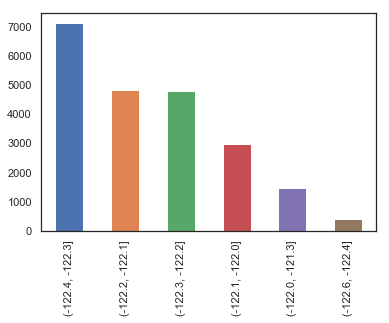

In [51]:
bins_long.value_counts().plot(kind='bar')

In [52]:
# Creating bins for 'yr_built'
bins = [1899,1919,1939,1959,1979,1999,2019]
bins_built = pd.cut(df['yr_built'],bins)
bins_built = bins_built.cat.as_unordered()
bins_built.head()

0    (1939, 1959]
1    (1939, 1959]
2    (1919, 1939]
3    (1959, 1979]
4    (1979, 1999]
Name: yr_built, dtype: category
Categories (6, interval[int64]): [(1899, 1919], (1919, 1939], (1939, 1959], (1959, 1979], (1979, 1999], (1999, 2019]]

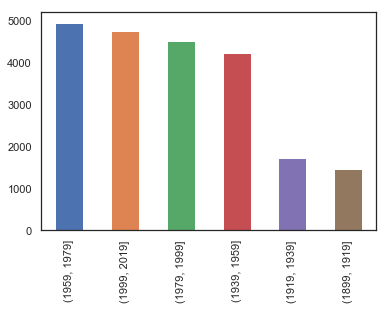

In [53]:
bins_built.value_counts().plot(kind='bar')

In [54]:
# Creating bins for 'yr_renovated'
bins = [-1,1,1959,1979,1999,2019]
bins_renovated = pd.cut(df['yr_renovated'],bins)
bins_renovated = bins_renovated.cat.as_unordered()
bins_renovated.head()

0         (-1, 1]
1    (1979, 1999]
2         (-1, 1]
3         (-1, 1]
4         (-1, 1]
Name: yr_renovated, dtype: category
Categories (5, interval[int64]): [(-1, 1], (1, 1959], (1959, 1979], (1979, 1999], (1999, 2019]]

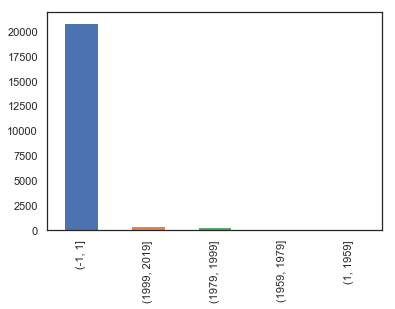

In [55]:
bins_renovated.value_counts().plot(kind='bar')

In [56]:
# Creating bins for 'zipcode'
bins = [98000,98030,98060,98090,98120,98150,98180,98210]
bins_zip = pd.cut(df['zipcode'],bins)
bins_zip = bins_zip.cat.as_unordered()
bins_zip.head()

0    (98150, 98180]
1    (98120, 98150]
2    (98000, 98030]
3    (98120, 98150]
4    (98060, 98090]
Name: zipcode, dtype: category
Categories (7, interval[int64]): [(98000, 98030], (98030, 98060], (98060, 98090], (98090, 98120], (98120, 98150], (98150, 98180], (98180, 98210]]

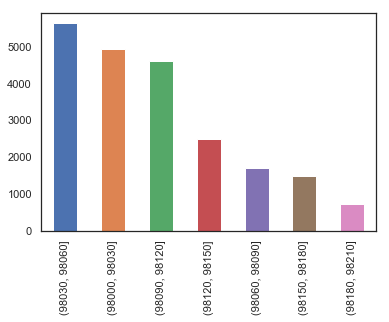

In [57]:
bins_zip.value_counts().plot(kind='bar')

Now that the bins are prepared, we can transform categorical variables into dummy variables

In [58]:
df['date']=bins_date
df['lat'] = bins_lat
df['long'] = bins_long
df['yr_built'] = bins_built
df['yr_renovated'] = bins_renovated
df['zipcode'] = bins_zip

In [59]:
df['date'] = df['date'].cat.codes
df['lat'] = df['lat'].cat.codes
df['long'] = df['long'].cat.codes
df['yr_built'] = df['yr_built'].cat.codes
df['yr_renovated'] = df['yr_renovated'].cat.codes
df['zipcode'] = df['zipcode'].cat.codes

In [60]:
date_dummies = pd.get_dummies(df['date'], prefix='date')
lat_dummies = pd.get_dummies(df['lat'], prefix='lat')
long_dummies = pd.get_dummies(df['long'], prefix='long')
built_dummies = pd.get_dummies(df['yr_built'], prefix='yr_built')
renovated_dummies = pd.get_dummies(df['yr_renovated'], prefix='yr_renovated')
zip_dummies = pd.get_dummies(df['zipcode'], prefix='zipcode')
waterfront_dummies = pd.get_dummies(df["waterfront"],prefix="waterfront")
view_dummies = pd.get_dummies(df["view"],prefix="view")
condition_dummies = pd.get_dummies(df["condition"],prefix="condition")

In [61]:
df = df.drop(['date','lat','long','yr_built','yr_renovated','zipcode','waterfront','view','condition'], axis=1)
df_final = pd.concat([df_final,date_dummies, lat_dummies,long_dummies,built_dummies,renovated_dummies,zip_dummies,waterfront_dummies,view_dummies,condition_dummies], axis=1)
df_final = df_final.rename(columns={"waterfront_0.0": "waterfront_no", "waterfront_1.0": "waterfront_yes", "waterfront_2.0":"waterfront_na"})

In [62]:
# The new dataframe now has dummy variables that should be converted back to category.
for column in df_final.iloc[:,10:].columns:
    df_final[column] = df_final[column].astype("category")

In [63]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 66 columns):
price             21596 non-null float64
bedrooms          21596 non-null float64
bathrooms         21596 non-null float64
sqft_lot          21596 non-null float64
floors            21596 non-null float64
grade             21596 non-null float64
sqft_above        21596 non-null float64
sqft_basement     21596 non-null float64
sqft_living15     21596 non-null float64
sqft_lot15        21596 non-null float64
date_0            21596 non-null category
date_1            21596 non-null category
date_2            21596 non-null category
date_3            21596 non-null category
date_4            21596 non-null category
date_5            21596 non-null category
date_6            21596 non-null category
date_7            21596 non-null category
date_8            21596 non-null category
date_9            21596 non-null category
date_10           21596 non-null category
date_11           2

The data is ready to be explored

# Data Exploration

### Visualize the distribution of the data
- Which predictor has the strongest positive relation to price?
- The lowest relation to price?
- Does the sqft of neighbor's houses matter to the price?

In [64]:
df_final.describe()

,price,bedrooms,bathrooms,sqft_lot,floors,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
count,2.159600e+04,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000
mean,5.402920e+05,0.491144,0.494403,0.339315,0.270195,0.631401,0.457866,0.060521,0.564872,0.344802
std,3.673760e+05,0.117909,0.141561,0.111877,0.281192,0.101851,0.131995,0.091841,0.119298,0.112878
min,7.800000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.220000e+05,0.458157,0.451839,0.281688,0.000000,0.577833,0.361000,0.000000,0.479997,0.285936
50%,4.500000e+05,0.458157,0.542481,0.332938,0.323657,0.577833,0.444662,0.000000,0.556861,0.341712
75%,6.450000e+05,0.578130,0.580482,0.374886,0.553295,0.668898,0.552296,0.116183,0.647535,0.380616
max,7.700000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


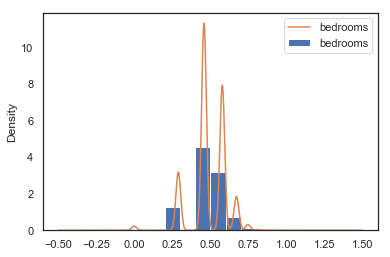

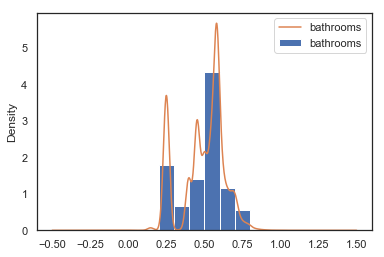

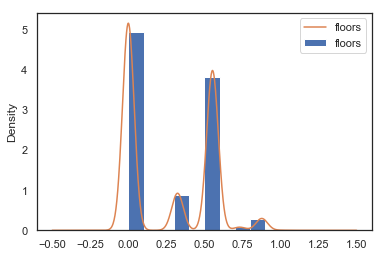

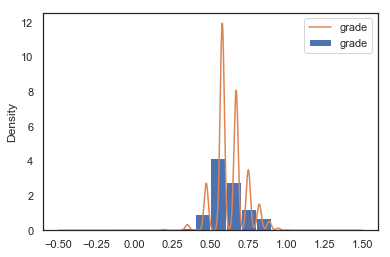

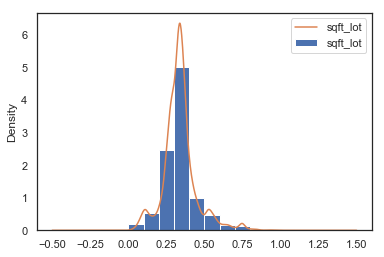

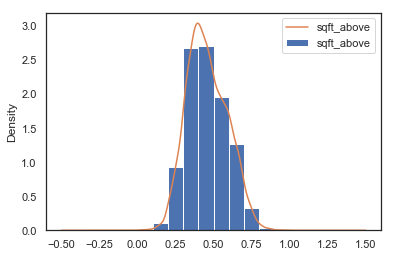

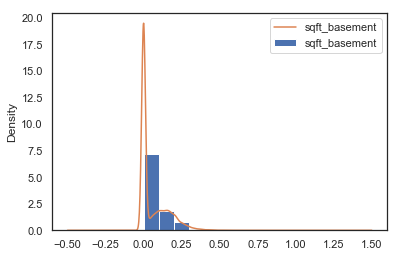

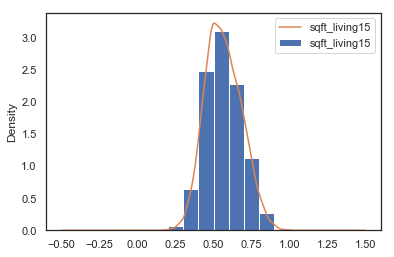

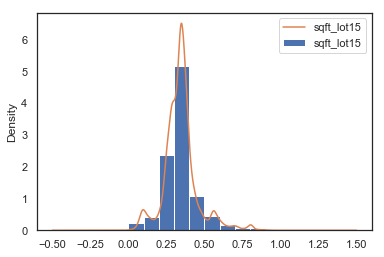

In [65]:
# KDE Plots to view distrbutions
# Helpful in viewing continuous variables, sqft data
for column in ['bedrooms','bathrooms','floors','grade','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']:
    df_final[column].plot.hist(density=True)
    df_final[column].plot.kde(label=column)
    plt.legend()
    plt.show()

From the KDE plots, we can see that...<br>
- most of the data except sqft_basement is normally distributed because of the log transformation
- sqft_basement has an overwhelming number of 0s.
- all data is between 0 and 1 due to min-max scaling 
- The non-continuous variables; bedrooms, bathrooms, floors, and grade are all multimodal. Not a good visualization tool for these types of data.

C:\Users\adcha\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


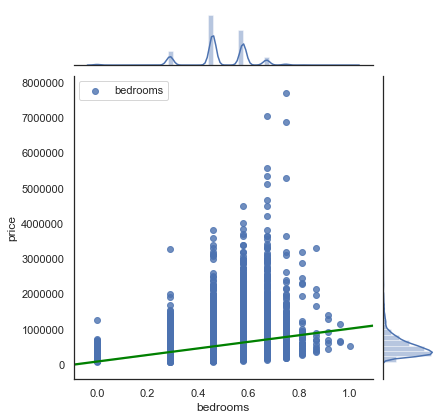

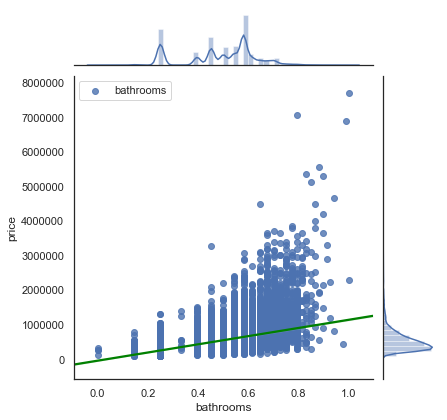

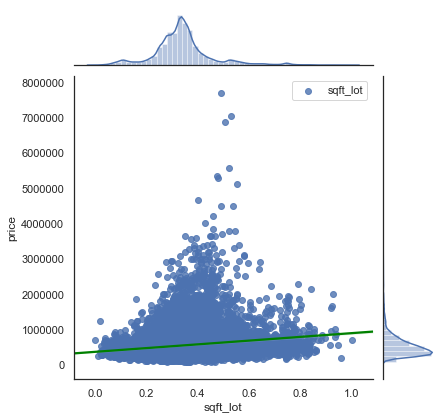

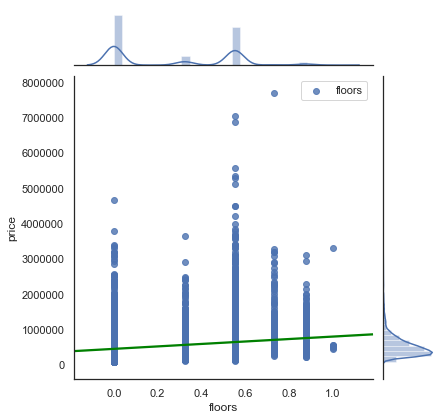

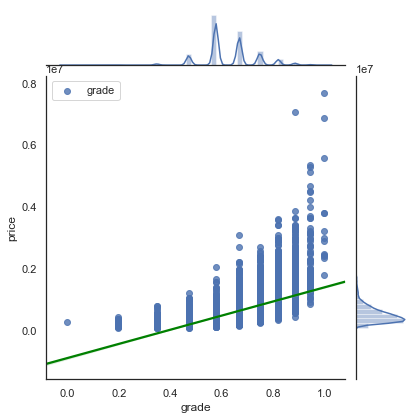

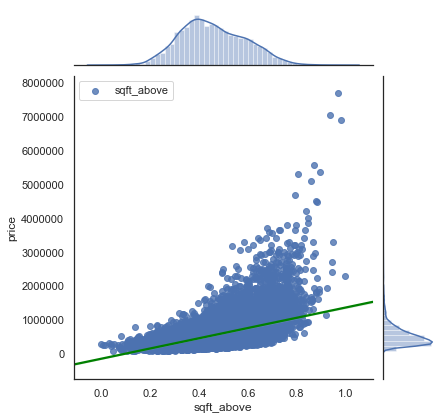

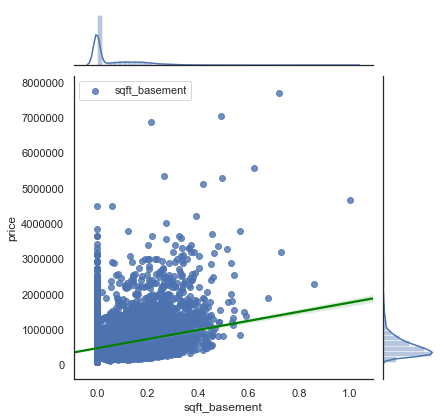

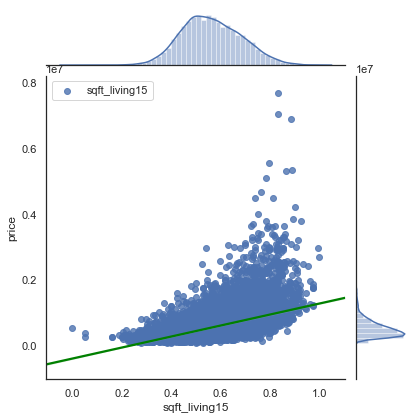

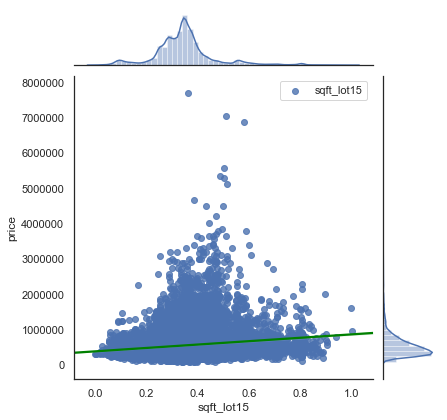

In [66]:
# Joint plots is useful in checking the correlation between each predictor and the target variable
for column in ['bedrooms','bathrooms','sqft_lot','floors','grade','sqft_above','sqft_basement','sqft_living15','sqft_lot15']:
    sns.jointplot(x=df_final[column],y=df_final['price'],
                 data=df_final,
                 kind='reg',
                 label=column,
                 joint_kws={'line_kws':{'color':'green'}})
    plt.legend()
    plt.show()

From the joint plots, we see that...
- the same non-continuous columns mentioned above are multimodal.
- All variables have a positive correlation to price
- grade is very highly correlated
- sqft_lot, sqft_lot15, and floors has weak correlation to the price
- initially, I thought the neighbor's houses won't determine the price, but the sqft_living15 shows a very positive correlation in price

Onto the modeling

# Modeling the Data

### Build a model for house sale forecasting in Kings County
- What factor has the biggest impact on housing price?
- What factor has the most negative impact on housing price?
- What are the slopes and intercept for the model?
- Does any variable have a p-value that is >0.5?
    - P-values <0.05 denotes that a parameter is significant
- How much of the variance can be explained by the model?
    - R_squared value
- What is causing the unexplained residual variation?

### Build single linear regression models
##### Continuous Variables
Before we build the model, we should take a look at each individual linear regression model for each continuous variable.<br>
Should I log transform the target variable? Would it produce a higher overall r_squared value?

In [67]:
# Log transform the target variable, price, for comparison
df_pricelog = df_final[df_final["price"]>0]
df_pricelog['price'] = np.log(df_pricelog['price'])

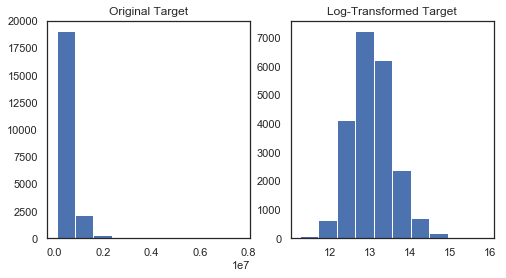

In [68]:
# Let's take a look at the side-by-side histograms for original and log-transformed target
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
plt.hist(df_final.price)
plt.title("Original Target")

plt.subplot(1, 2, 2)
plt.hist(df_pricelog.price)
plt.title("Log-Transformed Target")
plt.show()

From the histogram comparison, we can see that the original target was extemely positively skewed. It might be a good idea to continue with log-transformed target but let's take a look at the individual r_squared results below.

In [69]:
# Make sure the columns for describe are the continuous variables
df_final.describe()

,price,bedrooms,bathrooms,sqft_lot,floors,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
count,2.159600e+04,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000
mean,5.402920e+05,0.491144,0.494403,0.339315,0.270195,0.631401,0.457866,0.060521,0.564872,0.344802
std,3.673760e+05,0.117909,0.141561,0.111877,0.281192,0.101851,0.131995,0.091841,0.119298,0.112878
min,7.800000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.220000e+05,0.458157,0.451839,0.281688,0.000000,0.577833,0.361000,0.000000,0.479997,0.285936
50%,4.500000e+05,0.458157,0.542481,0.332938,0.323657,0.577833,0.444662,0.000000,0.556861,0.341712
75%,6.450000e+05,0.578130,0.580482,0.374886,0.553295,0.668898,0.552296,0.116183,0.647535,0.380616
max,7.700000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
# Making the models to compare each continuous predictor to the target
col_names = df_final.describe().columns.drop(['price'])
results = [['ind_var','r_squared','intercept','slope','p-value']]
for idx, val in enumerate(col_names):
    print ("price~" + val)
    f = "price~" + val
    model = smf.ols(formula=f, data=df_final).fit()
    X_new = pd.DataFrame({val: [df_final[val].min(), df_final[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
    print(results[idx+1])
    print ("------------------------------")

price~bedrooms
['bedrooms', 0.0895245526806, 82420.88909331446, 932254.2051831366, 0.0]
------------------------------
price~bathrooms
['bathrooms', 0.20805208482037596, -44949.13503625087, 1183733.5667751355, 0.0]
------------------------------
price~sqft_lot
['sqft_lot', 0.02610350357589175, 360271.6258966128, 530540.9533413504, 3.150729178543693e-126]
------------------------------
price~floors
['floors', 0.07108526985134833, 446173.15302429034, 348335.9500138657, 0.0]
------------------------------
price~grade
['grade', 0.403433725453744, -906272.1062736447, 2291038.3792147175, 0.0]
------------------------------
price~sqft_above
['sqft_above', 0.2945270026975847, -151306.44660369272, 1510482.3376717877, 0.0]
------------------------------
price~sqft_basement
['sqft_basement', 0.10484284854330694, 461903.83206693304, 1295219.9495206142, 0.0]
------------------------------
price~sqft_living15
['sqft_living15', 0.2957802559958651, -405758.20297076076, 1674804.00529426, 0.0]
---------

In [71]:
# Making the models to compare each continuous predictor to a log-transformed target 
col_names = df_pricelog.describe().columns.drop(['price'])
results_log = [['ind_var','r_squared','intercept','slope','p-value']]
for idx, val in enumerate(col_names):
    print ("price~" + val)
    f = "price~" + val
    model = smf.ols(formula=f, data=df_pricelog).fit()
    X_new = pd.DataFrame({val: [df_pricelog[val].min(), df_pricelog[val].max()]});
    preds = model.predict(X_new)
    results_log.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
    print(results_log[idx+1])
    print ("------------------------------")

price~bedrooms
['bedrooms', 0.1177554944288356, 12.29553089704099, 1.5324735042751518, 0.0]
------------------------------
price~bathrooms
['bathrooms', 0.2707041655746928, 12.091364811094843, 1.9353276857262962, 0.0]
------------------------------
price~sqft_lot
['sqft_lot', 0.019118960510224214, 12.827373534962163, 0.6507898395193888, 1.1874902987429346e-92]
------------------------------
price~floors
['floors', 0.10434700897327487, 12.884753310525355, 0.6049056006440333, 0.0]
------------------------------
price~grade
['grade', 0.48144493012938394, 10.783218049362343, 3.587225566523848, 0.0]
------------------------------
price~sqft_above
['sqft_above', 0.34346911476422526, 11.977726370819092, 2.337954479191358, 0.0]
------------------------------
price~sqft_basement
['sqft_basement', 0.100430615059796, 12.938231440947341, 1.8169638775467218, 0.0]
------------------------------
price~sqft_living15
['sqft_living15', 0.3686975108734133, 11.534273069999726, 2.6801161551323625, 0.0]
---

In [72]:
# Compare the r_squared results
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,bedrooms,0.0895246,82420.9,932254,0
2,bathrooms,0.208052,-44949.1,1.18373e+06,0
3,sqft_lot,0.0261035,360272,530541,3.15073e-126
4,floors,0.0710853,446173,348336,0
5,grade,0.403434,-906272,2.29104e+06,0
6,sqft_above,0.294527,-151306,1.51048e+06,0
7,sqft_basement,0.104843,461904,1.29522e+06,0
8,sqft_living15,0.29578,-405758,1.6748e+06,0
9,sqft_lot15,0.0218812,374293,481433,6.64088e-106


In [73]:
# Compare the r_squared resultslog
pd.DataFrame(results_log)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,bedrooms,0.117755,12.2955,1.53247,0
2,bathrooms,0.270704,12.0914,1.93533,0
3,sqft_lot,0.019119,12.8274,0.65079,1.18749e-92
4,floors,0.104347,12.8848,0.604906,0
5,grade,0.481445,10.7832,3.58723,0
6,sqft_above,0.343469,11.9777,2.33795,0
7,sqft_basement,0.100431,12.9382,1.81696,0
8,sqft_living15,0.368698,11.5343,2.68012,0
9,sqft_lot15,0.0153091,12.8492,0.577184,1.99612e-74


Judging from the results tables above...
- 6 out of 9 variables are more correlated to the log-transformed target
- The higher r_squared variables; grade, sqft_living15, sqft_above, bathrooms all increase with a log-transformed target
- All slopes are positive
- All p-values are <0.5
- Every r_squared value is >1%, but sqft_lot and sqft_lot15 are cutting it close

##### Categorical Variables
Let's also take a look at the individual linear regression models for categorical variables.<br>
Because we made dummies for each of the categorical variables, we need to drop one of each column.

In [74]:
# Dropping a column for each categorical variable
cols_date = df_final.columns[10:22]
cols_lat = df_final.columns[23:28]
cols_long = df_final.columns[29:34]
cols_built = df_final.columns[35:40]
cols_renovated = df_final.columns[41:45]
cols_zip = df_final.columns[46:52]
cols_waterfront = df_final.columns[53:55]
cols_view = df_final.columns[56:60]
cols_condition = df_final.columns[61:65]

In [75]:
# indvidual linear models for categorical variables to the original target
cols = [cols_date, cols_lat, cols_long , cols_built, cols_renovated, cols_zip, cols_waterfront, cols_view, cols_condition]
for col in cols:
    sum_cols = "+".join(col)
    form = "price ~" + sum_cols
    model = smf.ols(formula= form, data= df_final).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.841
Date:                Tue, 14 May 2019   Prob (F-statistic):           0.000658
Time:                        10:53:31   Log-Likelihood:            -3.0736e+05
No. Observations:               21596   AIC:                         6.147e+05
Df Residuals:                   21583   BIC:                         6.148e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     5.582e+05   1.44e+04     38.638   

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     36.84
Date:                Tue, 14 May 2019   Prob (F-statistic):           9.46e-31
Time:                        10:53:32   Log-Likelihood:            -3.0730e+05
No. Observations:               21596   AIC:                         6.146e+05
Df Residuals:                   21591   BIC:                         6.147e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [76]:
# indvidual linear models for categorical variables to the log-transformed target
cols = [cols_date, cols_lat, cols_long , cols_built, cols_renovated, cols_zip, cols_waterfront, cols_view, cols_condition]
for col in cols:
    sum_cols = "+".join(col)
    form = "price ~" + sum_cols
    model = smf.ols(formula= form, data= df_pricelog).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     5.210
Date:                Tue, 14 May 2019   Prob (F-statistic):           8.07e-09
Time:                        10:53:32   Log-Likelihood:                -16760.
No. Observations:               21596   AIC:                         3.355e+04
Df Residuals:                   21583   BIC:                         3.365e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0757      0.021    631.888   

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     754.2
Date:                Tue, 14 May 2019   Prob (F-statistic):               0.00
Time:                        10:53:32   Log-Likelihood:                -15379.
No. Observations:               21596   AIC:                         3.077e+04
Df Residuals:                   21591   BIC:                         3.081e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      14.0147      0.028    505.852      

We will continue with price_log because it has a higher overall R_squared

In [77]:
# None of the continuous variables have R-squared value <0.1, therefore nothing to drop
# Dropping 1 column for each categorical variable
df_pricelog = df_pricelog.drop(["date_12", "lat_5", "long_5", "yr_built_5","yr_renovated_4","zipcode_6","waterfront_na","view_4","condition_5"],axis=1)
df_pricelog.describe()

,price,bedrooms,bathrooms,sqft_lot,floors,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
count,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000
mean,13.048196,0.491144,0.494403,0.339315,0.270195,0.631401,0.457866,0.060521,0.564872,0.344802
std,0.526562,0.117909,0.141561,0.111877,0.281192,0.101851,0.131995,0.091841,0.119298,0.112878
min,11.264464,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.682307,0.458157,0.451839,0.281688,0.000000,0.577833,0.361000,0.000000,0.479997,0.285936
50%,13.017003,0.458157,0.542481,0.332938,0.323657,0.577833,0.444662,0.000000,0.556861,0.341712
75%,13.377006,0.578130,0.580482,0.374886,0.553295,0.668898,0.552296,0.116183,0.647535,0.380616
max,15.856731,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Feature Ranking
#### Recursive Feature Elimination to rank the importance of each variable
- All features need to be on same scale in order to use RFE
- Which features are the most impactful?
- How many features are needed before the model's r_squared plateaus?

In [78]:
# Store the predictors on 'X'
# Store the target on 'y'
y = df_pricelog[["price"]]
X = df_pricelog.drop(["price"], axis=1)

In [79]:
# Creating an instance of the LinearRegression and RFE class
# We are selecting only 1 feature so we can see the ranking from first to last
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=1)

In [80]:
# Fit the X and y into the RFE
# Use the linear regression and determine what the best feature is
selector = selector.fit(X, np.ravel(y))

In [81]:
# assigns weights to the features
# The weights are the coefficients of the linear regression model
# RFE is looking at whatever has the highest regression coefficient, that is the most important feature
selector.ranking_

array([25, 16, 10, 34,  1,  3,  2,  5, 20, 36, 43, 38, 42, 37, 40, 41, 39,
       44, 49, 52, 54,  6,  7,  8, 50,  9, 21, 46, 45, 48, 47, 14, 15, 55,
       32, 33, 24, 23, 22, 26, 30, 31, 53, 28, 29, 51, 56,  4, 12, 18, 17,
       19, 11, 13, 27, 35])

Each feature above is being ranked based on the coefficients of the linear regression model.

In [82]:
# Store the ranking as a variable to use later as a column
ranking = selector.ranking_

In [83]:
linreg.fit(X, np.ravel(y))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [84]:
# Taking a look at each of the predictor's coefficients
linreg.coef_

array([-1.03967961e-01,  2.18197445e-01,  5.11692983e-01, -5.84958270e-02,
        1.36275862e+00,  1.18505503e+00,  6.37471970e-01,  5.82672037e-01,
       -7.35127489e-02, -1.03132088e-01, -8.30526345e-02, -9.28721738e-02,
       -9.07726965e-02, -9.48312852e-02, -9.31422834e-02, -9.16581487e-02,
       -9.35246963e-02, -8.23425652e-02, -5.97407783e-02, -3.73033014e-02,
       -1.51872105e-02, -5.08436285e-01, -4.56697878e-01, -2.81282206e-01,
        3.38988878e-02,  2.53620943e-01,  2.30139641e-01,  1.09897969e-01,
        1.09958482e-01,  5.13374246e-02,  7.39581632e-02,  7.18993123e-02,
        6.78706862e-02, -1.28768067e-02, -8.95814723e-02, -7.22998166e-02,
       -1.63573920e-01, -1.82384745e-01, -2.41909993e-01, -9.88100016e-02,
        7.05960582e-02,  7.54669815e-02, -2.11831630e-02,  7.43869712e-02,
        5.26330797e-02, -3.68896635e-02,  1.16006045e-03,  4.16588999e-01,
       -3.03478522e-01, -1.66296525e-01, -1.93148829e-01, -1.39952456e-01,
       -3.74532771e-01, -

In [85]:
# Store the coefficients as a variable to use later as a column
coef = linreg.coef_

In [86]:
# Turn the column into a dataframe to easily see the ranking of features
features = pd.DataFrame({'Columns': X.columns,
                        'Ranking': ranking,
                        'Coefficient': coef})
features = features.sort_values('Ranking')
features

,Columns,Ranking,Coefficient
4,grade,1,1.362759
6,sqft_basement,2,0.637472
5,sqft_above,3,1.185055
47,waterfront_yes,4,0.416589
7,sqft_living15,5,0.582672
21,lat_0,6,-0.508436
22,lat_1,7,-0.456698
23,lat_2,8,-0.281282
25,lat_4,9,0.253621
2,sqft_lot,10,0.511693


Top 5 important features are <br>
1) grade<br>
2) sqft_basement<br>
3) sqft_above<br>
4) waterfront_yes<br>
5) sqft_living15<br>

Top 5 positve coefficients are <br>
1) grade<br>
2) sqft_above<br>
3) sqft_basement<br>
4) sqft_living15<br>
5) sqft_lot

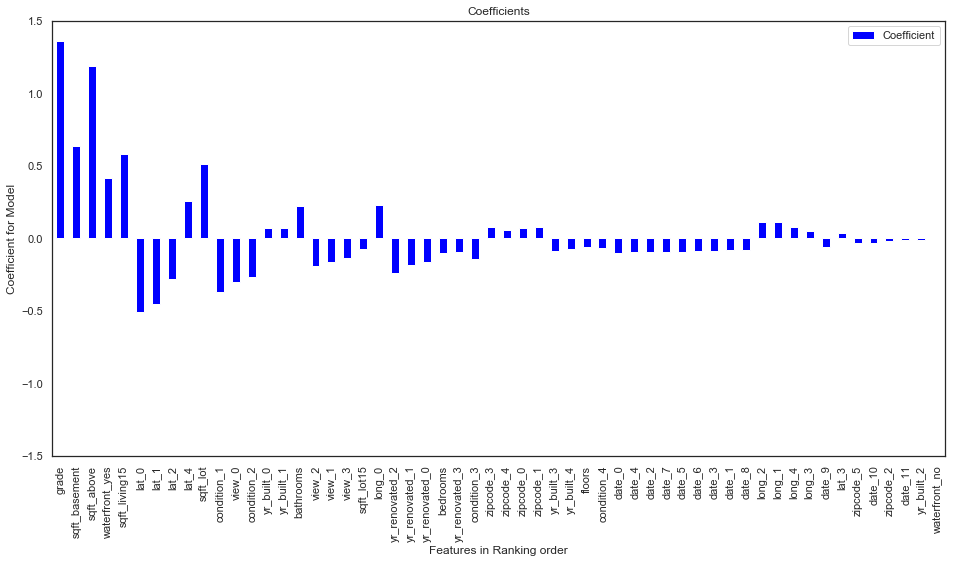

In [87]:
# Visualizing the Coefficients using a bar graph
ax = features.set_index('Columns').plot(y='Coefficient',kind = 'bar',color = 'blue',figsize = (16, 8))
ax.set_title("Coefficients")
ax.set_ylabel("Coefficient for Model")
ax.set_ylim(-1.5,1.5)
ax.set_xlabel("Features in Ranking order")
plt.show()

Looking at the coefficients, we can see that grade (1.36276) is the highest coefficient.<br>
Grade has the most impact on the model

### R_Squared
- Statistical measure that tells us how much of the variance can be explained by the predictors

In [88]:
# Looping through the number of features to find the r_squared of each +1 feature instance

r_squared = []
for x in range(1, len(X.columns)+1):
    selector = RFE(linreg, n_features_to_select=x)
    selector = selector.fit(X, np.ravel(y))
    linreg.fit(X[X.columns[selector.support_]], y)
    r_sq = linreg.score(X[X.columns[selector.support_]], y)
    r_squared.append(r_sq)

In [89]:
r_squared

[0.48144493012938416,
 0.522559895269817,
 0.5510548665103947,
 0.5613112045948541,
 0.5689320107986979,
 0.5908865935721431,
 0.6911844472146852,
 0.7537010162604012,
 0.7941532922822695,
 0.7963283548815409,
 0.7964933008876511,
 0.8059014822768299,
 0.8064325171562186,
 0.8103541613268092,
 0.815667323124226,
 0.8161684560344511,
 0.8168314022485869,
 0.8169438508306273,
 0.8173938618724349,
 0.8175094562143067,
 0.8185037460151927,
 0.8185804192162678,
 0.8185873157577058,
 0.819560724300587,
 0.8197795862575431,
 0.8199307850611693,
 0.8254332594202277,
 0.8266167084015197,
 0.8275238457381281,
 0.827929852027254,
 0.8297154396625301,
 0.8309597131244149,
 0.8332766292178867,
 0.8337380164659007,
 0.8345093379192117,
 0.8347657598605127,
 0.8349327144179025,
 0.835159595357392,
 0.835345927426452,
 0.8356392662570884,
 0.835915359645234,
 0.8364123107700792,
 0.8369966813861061,
 0.8373848406219812,
 0.8378690113296176,
 0.8385934056352283,
 0.839031195076796,
 0.8393424946265138,

In order, the r_squared above tells us...<br>
1) r_squared of the best feature<br>
2) r_squared of the 2 best features<br>
3) r_squared of the 3 best features<br>
and so on...<br><br>
Plotting this may be easier to visualize where the model plateaus

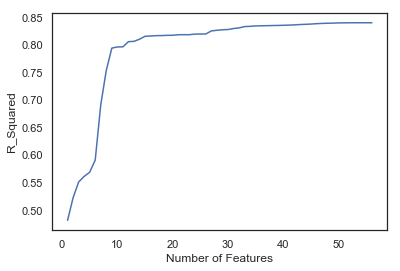

In [90]:
# Elbow plot
plt.plot(range(1, len(X.columns)+1), r_squared)
plt.ylabel('R_Squared')
plt.xlabel('Number of Features');

The elbow plot tells us that the model plateaus at about 10 features.<br>
10 features has an r_squared of about 0.80<br>
According to R_squared loop above, 10 features = 0.7963

In [91]:
# Creating another loop where I can see the r_sq and adjusted r_sq for every +5 features
# 5, 10, 15, 20, 25...
r_list = []
adj_r_list = []
list_n = list(range(5,51,5))
for n in list_n:
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X, np.ravel(y))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X[selected_columns],y)
    yhat = linreg.predict(X[selected_columns])
    SS_Residual = np.sum((y-yhat)**2)
    SS_Total = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    print("r_squared: ", r_squared)
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print("adjusted_r_squared: ", adjusted_r_squared)
r_list.append(r_squared)
adj_r_list.append(adjusted_r_squared)

r_squared:  price    0.568932
dtype: float64
adjusted_r_squared:  price    0.567811
dtype: float64
r_squared:  price    0.796328
dtype: float64
adjusted_r_squared:  price    0.795799
dtype: float64
r_squared:  price    0.815667
dtype: float64
adjusted_r_squared:  price    0.815188
dtype: float64
r_squared:  price    0.817509
dtype: float64
adjusted_r_squared:  price    0.817035
dtype: float64
r_squared:  price    0.81978
dtype: float64
adjusted_r_squared:  price    0.819311
dtype: float64
r_squared:  price    0.82793
dtype: float64
adjusted_r_squared:  price    0.827482
dtype: float64
r_squared:  price    0.834509
dtype: float64
adjusted_r_squared:  price    0.834079
dtype: float64
r_squared:  price    0.835639
dtype: float64
adjusted_r_squared:  price    0.835212
dtype: float64
r_squared:  price    0.837869
dtype: float64
adjusted_r_squared:  price    0.837447
dtype: float64
r_squared:  price    0.839985
dtype: float64
adjusted_r_squared:  price    0.839569
dtype: float64


We are confirming our thought that at around 10 features, our model plateaus.

## Stepwise Selection
- Start with an empty model (only includes the intercept)
- Each step, a variable with the associated parameter estimate with the lowest p-value is added to the model (forward)
- The algorithm looks at p-values of all other parameter estimates which are already in the model and removes the p-value that exceeds 0.05 (backward)
- Finishes when no more variables can be added or removed

In [92]:
# Changing the categorical columns to float for stepwise_selection
X_features = pd.DataFrame([])
X_features = X.iloc[:,:9]
for column in X.iloc[:,9:].columns:
    X_features[column] = X[column].astype(float)

In [93]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [94]:
result = stepwise_selection(X_features, y, verbose = True)
print('resulting features:')
print(result)

Add  lat_4                          with p-value 0.0
Add  sqft_above                     with p-value 0.0
Add  view_0                         with p-value 0.0
Add  lat_1                          with p-value 0.0
Add  lat_0                          with p-value 0.0
Add  sqft_basement                  with p-value 0.0
Add  lat_3                          with p-value 0.0
Add  lat_2                          with p-value 0.0
Add  grade                          with p-value 0.0
Add  waterfront_yes                 with p-value 2.32422e-175
Add  condition_3                    with p-value 6.91783e-170
Add  sqft_living15                  with p-value 4.14443e-150
Add  yr_built_1                     with p-value 2.53764e-71
Add  yr_built_0                     with p-value 6.38636e-90
Add  yr_built_2                     with p-value 1.76057e-70
Add  sqft_lot                       with p-value 2.20503e-38
Add  zipcode_2                      with p-value 3.97039e-51
Add  bathrooms                  

We will use the resulting features for the Statsmodel

### Statsmodel
- Runs Ordinary Least Squared (OLS) regression experiments
- OLS regression is a method for estimating the unknown parameters in a linear regressoin model.
- For Multiple Linear regressions, it gives us the intercept, coefficient for each variable, and the resulting R-squared.

In [95]:
X_fin = X_features[['floors', 'sqft_basement', 'sqft_living15', 'lat_4', 'lat_3', 'grade', 'lat_1', 'sqft_above', 'lat_0', 'lat_2', 'view_0', 'waterfront_yes', 'condition_3', 'yr_built_3', 'yr_renovated_0', 'yr_built_4', 'sqft_lot', 'zipcode_2', 'zipcode_5', 'date_11', 'condition_2', 'long_0', 'condition_4', 'zipcode_3', 'date_10', 'condition_1', 'long_2', 'long_1', 'bathrooms', 'view_2', 'yr_renovated_2', 'long_4', 'long_3', 'bedrooms', 'yr_renovated_3', 'view_1', 'view_3', 'yr_built_0', 'yr_built_1', 'date_9', 'yr_renovated_1', 'date_0', 'zipcode_1', 'zipcode_0', 'zipcode_4']]
X_int = sm.add_constant(X_fin)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     2501.
Date:                Tue, 14 May 2019   Prob (F-statistic):               0.00
Time:                        10:55:52   Log-Likelihood:                 2950.5
No. Observations:               21596   AIC:                            -5809.
Df Residuals:                   21550   BIC:                            -5442.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             11.5440      0.027    426.291      0.000      11.491      11.597
floors            -0.0534      0.008     -6.405      0.000      -0.070      -0.037
sqft_basement      0.6390      0.022     28.889      0.000       0.596       0.682
sqft_living15      0.5778      0.021     28.128      0.000       0.538       0.618
lat_4              0.2523      0.005     47.629      0.000       0.242       0.263
lat_3              0.0340      0.005      6.916      0.000       0.024       0.044
grade              1.3684      0.025     53.841      0.000       1.319       1.418
lat_1             -0.4550      0.006    -77.978      0.000      -0.466      -0.444
sqft_above         1.1847      0.026     45.506      0.000       1.134       1.236
lat_0             -0.5069      0.009    -57.003      0.000      -0.524      -0.489
lat_2             -0.2808      0.006    -49.186      0.000      -0.292      -0.270
view_0            -0.3016      0.015    -20.168      0.000      -0.331      -0.272
waterfront_yes     0.4134      0.022     19.193      0.000       0.371       0.456
condition_3       -0.1415      0.006    -24.623      0.000      -0.153      -0.130
yr_built_3        -0.0825      0.004    -18.928      0.000      -0.091      -0.074
yr_renovated_0    -0.1584      0.011    -14.141      0.000      -0.180      -0.136
yr_built_4        -0.0689      0.004    -16.071      0.000      -0.077      -0.061
sqft_lot           0.4403      0.019     23.769      0.000       0.404       0.477
zipcode_2         -0.0215      0.011     -1.971      0.049      -0.043      -0.000
zipcode_5         -0.0392      0.010     -3.847      0.000      -0.059      -0.019
date_11            0.0711      0.005     14.769      0.000       0.062       0.081
condition_2       -0.2619      0.017    -15.287      0.000      -0.296      -0.228
long_0             0.2268      0.013     17.252      0.000       0.201       0.253
condition_4       -0.0638      0.006    -10.734      0.000      -0.076      -0.052
zipcode_3          0.0747      0.009      8.244      0.000       0.057       0.092
date_10            0.0491      0.005      9.455      0.000       0.039       0.059
condition_1       -0.3641      0.040     -9.156      0.000      -0.442      -0.286
long_2             0.1081      0.007     14.884      0.000       0.094       0.122
long_1             0.1078      0.008     13.563      0.000       0.092       0.123
bathrooms          0.2296      0.018     12.868      0.000       0.195       0.265
view_2            -0.1915      0.016    -11.946      0.000      -0.223      -0.160
yr_renovated_2    -0.2427      0.027     -8.942      0.000      -0.296      -0.189
long_4             0.0741      0.007     10.488      0.000       0.060       0.088
long_3             0.0507      0.007      7.355      0.000       0.037       0.064
bedrooms    

We used a log-transformed target, therefore our results are changed in percentages.<br>
A 1% increase in sqft_basement leads to a 0.64% increase in price.<br>
A 1% increase in grade leads to a 1.37% increase in price.


# Train-test-split
- Model is created to predict the future outcome of houses
- Train the model using sample of our data (for this model, we use 80%)
    - Fit a linear regression using the parameter estimates
- Test the model using the rest of the data (20%)
    - Compare the actual targets with the fitted targets from the model

In [96]:
# We are splitting the train/test by 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=3)

In [97]:
# Creating a loop where I see the mean squared error of test and train for every +5 features
# 5, 10, 15, 20, 25...
MSE_test = []
MSE_train = []
list_n = list(range(5,51,5))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X_train, np.ravel(y_train))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X_train[selected_columns],y_train)
    yhat_train = linreg.predict(X_train[selected_columns])
    yhat_test = linreg.predict(X_test[selected_columns])
    mse_train = np.sum((y_train-yhat_train)**2)/len(y_train)
    mse_test =np.sum((y_test-yhat_test)**2)/len(y_test)
    print("Train: ", mse_train)
    print("Test: ", mse_test)
MSE_test.append(mse_test)
MSE_train.append(mse_train)

Train:  price    0.119481
dtype: float64
Test:  price    0.119747
dtype: float64
Train:  price    0.056449
dtype: float64
Test:  price    0.056635
dtype: float64
Train:  price    0.05112
dtype: float64
Test:  price    0.05137
dtype: float64
Train:  price    0.050546
dtype: float64
Test:  price    0.050931
dtype: float64
Train:  price    0.049917
dtype: float64
Test:  price    0.050341
dtype: float64
Train:  price    0.047821
dtype: float64
Test:  price    0.047443
dtype: float64
Train:  price    0.045964
dtype: float64
Test:  price    0.045669
dtype: float64
Train:  price    0.045557
dtype: float64
Test:  price    0.045312
dtype: float64
Train:  price    0.044999
dtype: float64
Test:  price    0.044482
dtype: float64
Train:  price    0.04458
dtype: float64
Test:  price    0.043751
dtype: float64


After each instance of above loop, the train and test MSE decreases.<br>
Also, for each instance, there isn't a big difference between the train and test MSE

In [98]:
# Again, we are splitting the train/test by 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [99]:
# The number of data for each train/test for X and y
print(len(X_train), len(X_test), len(y_train), len(y_test))

17276 4320 17276 4320


In [100]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [101]:
# y_hat is what the model predicts to be the target
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [102]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.04418957955344115
Test Mean Squarred Error: 0.04490100447163355


The MSE is the squared average distance between actual and predicted target values<br>

### Train-test split model
- Iterate the model for test sizes from 0.05 to 0.95
    - 0.05, 0.10, 0.15, 0.20, 0.25...
- Plot the MSE points for both train and test on all iterations
- testsize = 0.05 is overfitting
- testsize = 0.95 is underfitting

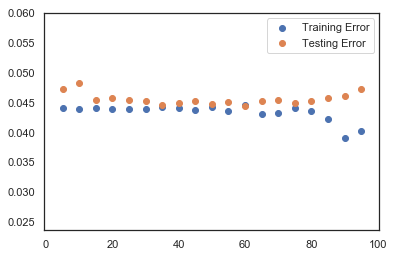

In [103]:
import random
random.seed(11)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

Everytime we run the above model, we get a different result. That is because the results for each iteration can change.<br>
If we run 20 iterations for each testsize value and average the results of each iteration, it will eliminate the "noise" of the data.

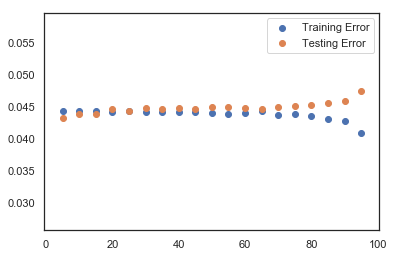

In [104]:
random.seed(8)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    temp_train_err = []
    temp_test_err = []
    for i in range(20):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
        linreg.fit(X_train, y_train)
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        temp_train_err.append(mean_squared_error(y_train, y_hat_train))
        temp_test_err.append(mean_squared_error(y_test, y_hat_test))
    train_err.append(np.mean(temp_train_err))
    test_err.append(np.mean(temp_test_err))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

If the test error is substantially worse than the train error, that is a sign that the doesn't generalize well to future data.<br>

After eliminating the data variance, we can see that as we increase our test size, the difference in training error and testing error increases.

## K-Fold Cross Validation
- Expands on the idea of Train-Test-Split
- Splits the entire dataset into {K} equal sections of data
- Train K linear regression models on the data, each model using a different section for testing and all other sections combined for training
- Average the results of each linear model to get a Cross-Validation MSE

In [105]:
def kfolds(data, k):
    #Force data as pandas dataframe
    data = pd.DataFrame(data)
    num_observations = len(data)
    fold_size = num_observations//k
    leftovers = num_observations%k
    folds = []
    start_obs = 0
    for fold_n in range(1,k+1):
        if fold_n <= leftovers:
            #Fold Size will be 1 larger to account for leftovers
            fold =  data.iloc[start_obs : start_obs+fold_size+1] 
            folds.append(fold)
            start_obs +=  fold_size + 1
        else:
            fold =  data.iloc[start_obs : start_obs+fold_size] 
            folds.append(fold)
            start_obs +=  fold_size
            
    return folds 

In [106]:
data = pd.concat([X, y], axis=1)
data_folds = kfolds(data, 5)

In [107]:
test_errs = []
train_errs = []
k=5

for n in range(k):
    # Split in train and test for the fold
    train = pd.concat([fold for i, fold in enumerate(data_folds) if i!=n])
    test = data_folds[n]
    # Fit a linear regression model
    linreg.fit(train[X.columns], train[y.columns])
    #Evaluate Train and Test Errors
    y_hat_train = linreg.predict(train[X.columns])
    y_hat_test = linreg.predict(test[X.columns])
    train_residuals = y_hat_train - train[y.columns]
    test_residuals = y_hat_test - test[y.columns]
    train_errs.append(np.mean(train_residuals.astype(float)**2))
    test_errs.append(np.mean(test_residuals.astype(float)**2))
print("train errors:",train_errs)
print("test errors:",test_errs)

train errors: [price    0.043864
dtype: float64, price    0.043993
dtype: float64, price    0.044389
dtype: float64, price    0.044288
dtype: float64, price    0.044691
dtype: float64]
test errors: [price    0.046244
dtype: float64, price    0.045681
dtype: float64, price    0.044135
dtype: float64, price    0.044454
dtype: float64, price    0.043027
dtype: float64]


We split the dataset into 5 equal sections of the data and ran the kfold function.<br>
Below we will grab the average of the 5 results of the kfold functions.

In [108]:
np.mean(train_errs), np.mean(test_errs)

(0.04424493711403375, 0.04470813878499988)

In [109]:
# Cross-Validation MSE
select_85 = RFE(linreg, n_features_to_select = 85)
select_85 = select_n.fit(X, np.ravel(y))
selected_columns = X.columns[select_85.support_]
cv_5_results = np.mean(cross_val_score(linreg, X[selected_columns], y, cv=5, scoring="neg_mean_squared_error"))
cv_10_results = np.mean(cross_val_score(linreg, X[selected_columns], y, cv=10, scoring="neg_mean_squared_error"))
cv_20_results = np.mean(cross_val_score(linreg, X[selected_columns], y, cv=20, scoring="neg_mean_squared_error"))

In [110]:
# The mean of the Cross-Validation MSE
print("5 equal sections:",cv_5_results)
print("10 equal sections:",cv_10_results)
print("20 equal sections:",cv_20_results)

5 equal sections: -0.04475769960511158
10 equal sections: -0.0447054348042565
20 equal sections: -0.04467209358036968


#### The model's actual Mean Squared Error is about 4.5%